<h1>MICROSOFT STOCK PRICE FORECASTING<h1>




## Importing required libraries


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pylab import rcParams
from pmdarima import auto_arima

## Q1. Import your dataset in Python file.(0.5m)

### Loading the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive

Mounted at /content/gdrive
MyDrive


In [ ]:
# Read the data
df = pd.read_csv('/content/gdrive/MyDrive/Microsoft_Stock.csv')
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


## Q2. Explain your dataset in format - (1.5m)         
Objective

How many columns, rows are there in your dataset

Explain where did you get it from

### Dataset Description

[https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis](https://)

The dataset consists of Microsoft stock market information spanning from 04/01/2015 through 04/01/2021 is acquired in google sheets using the command 'GOOGLEFINANCE' taken from Kaggle website and it comprises of 1511 rows and 6 columns.

Description of columns:
1. Date: Represents the date of each observation in the format 'mm-dd-yy'.
2. Open: Indicates the opening price of the Microsoft stock at the beginning of the trading day.
3. High: Represents the highest price reached by the Microsoft stock during the trading day.
4. Low: Denotes the lowest price reached by the Microsoft stock during the trading day.
5. Close: Signifies the closing price of the Microsoft stock at the end of the trading day.
6. Volume: Indicates the number of shares traded for Microsoft stock on each respective trading day.

### Objective

Develop a time series model that fits the historical closing values of Microsoft stock from April 1, 2015 to April 1, 2021. Evaluate the model's predicted closing prices with actual data from this time period to see how well it captures historical trends and seasonality.

### Defining x and y variable

x Variable (Predictor): Time is the independent variable used for prediction.

y Variable (Target): Closing price is the dependent variable to be predicted. It represents the numerical value of the stock price at the end of each time period, serving as the target variable for the forecasting model.

We predict the closing price (y) based on historical dates (x).

## Data Preprocessing

> Add blockquote




In [ ]:
# Convert 'date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

Converting the 'date' column to datetime format ensures standardized date handling for efficient time-based operations.

In [ ]:
# Set 'date' as index
df.set_index('Date', inplace=True)

Time is set as the index rather than as a column in time series analysis because it facilitates more efficient data retrieval and aligns with standard time series analysis workflows.

In [ ]:
#view the dataset
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


## Q3. Were there any missing values or outliers were there in your data? If yes, how did you treat it? (1m)

In [ ]:
# To check presence of total no. of missing values
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Interpretation:**

There are no misssing values in our dataset.

Text(0.5, 0, 'Plot')

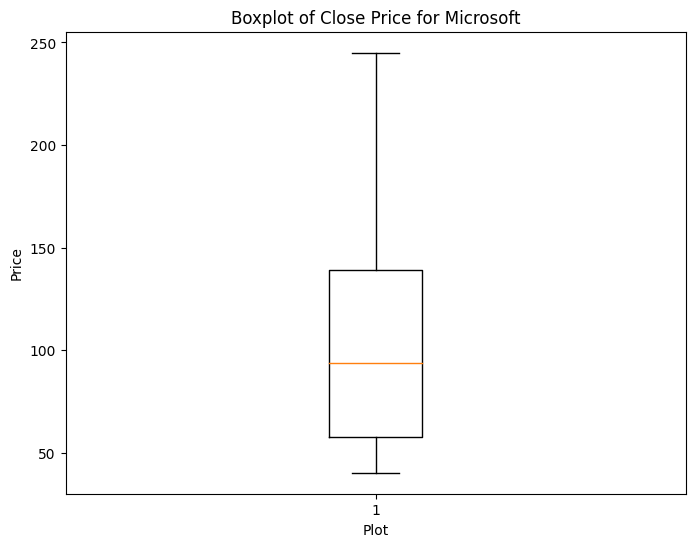

In [ ]:
# To check presence of Outliers in the dataset
plt.figure(figsize=(8, 6))
box = plt.boxplot(df['Close'])
plt.title('Boxplot of Close Price for Microsoft')
plt.ylabel('Price')
plt.xlabel('Plot')

**Interpretation:**

There are no outliers in our dataset.
The plot signifies positive skewness. The data has a larger number of values clustered towards the lower end and a few extreme values on the higher end.





## Q4. Depict the exploratory analysis of your dataset. (2m)

### Exploratory data analysis

In [ ]:
# Display a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [ ]:
# Display the dimensions of the DataFrame, showing the number of rows and columns, in one line.
df.shape

(1511, 5)

In [ ]:
# Display summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles.
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


**Interpretation:**


From the statistics, we can observe that the mean close price value is 107.422091 and the maximum close price value is 244.9900000

Text(0.5, 1.0, 'Distribution of Close Price')

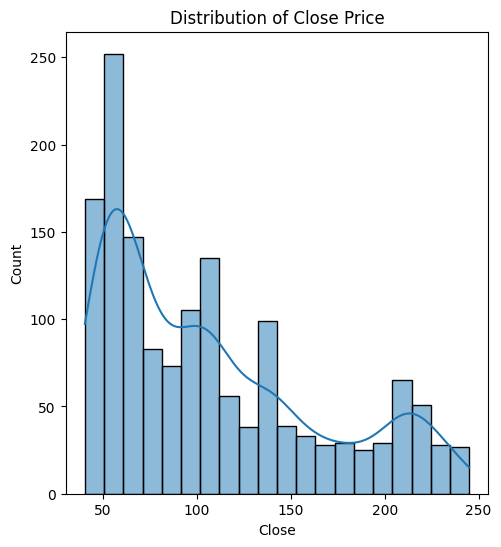

In [ ]:
#Distribution Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Distribution of Close Price')

**Interpretation:**

Looking at the histogram, the data seems to be positively skewed. The distribution has a longer right tail, with the majority of the data clustered towards the left.

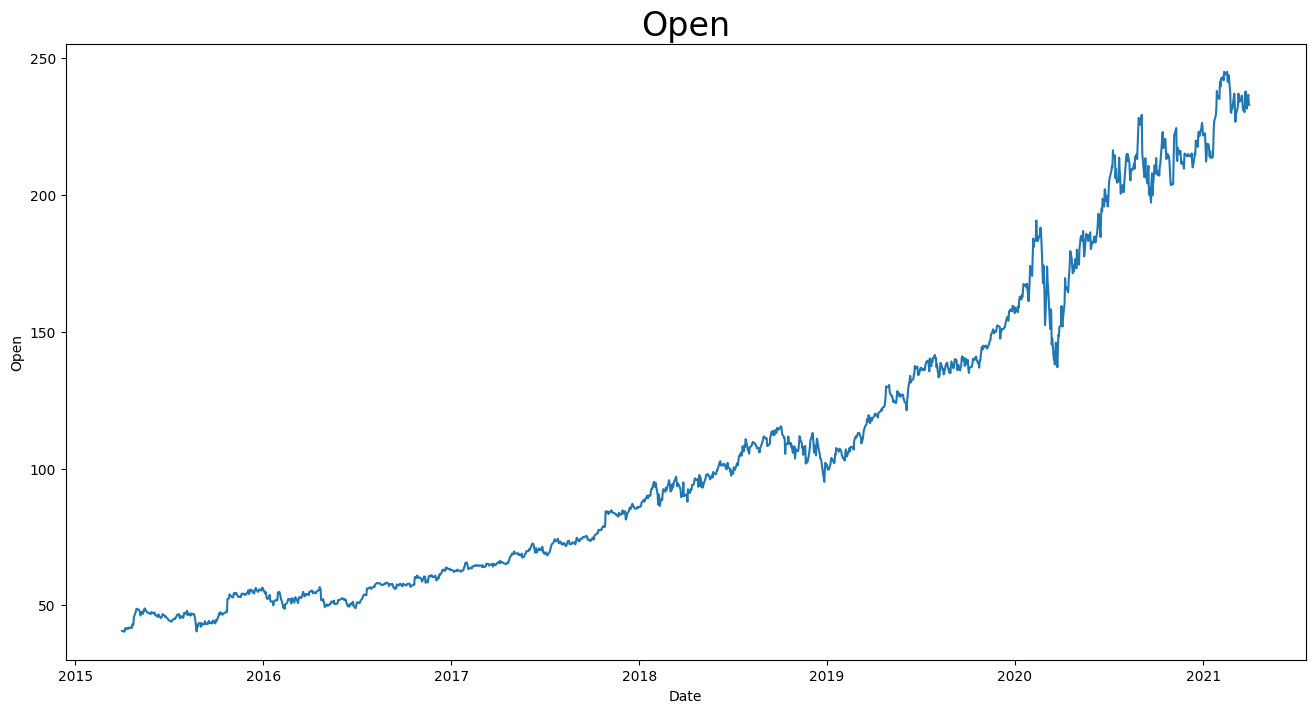

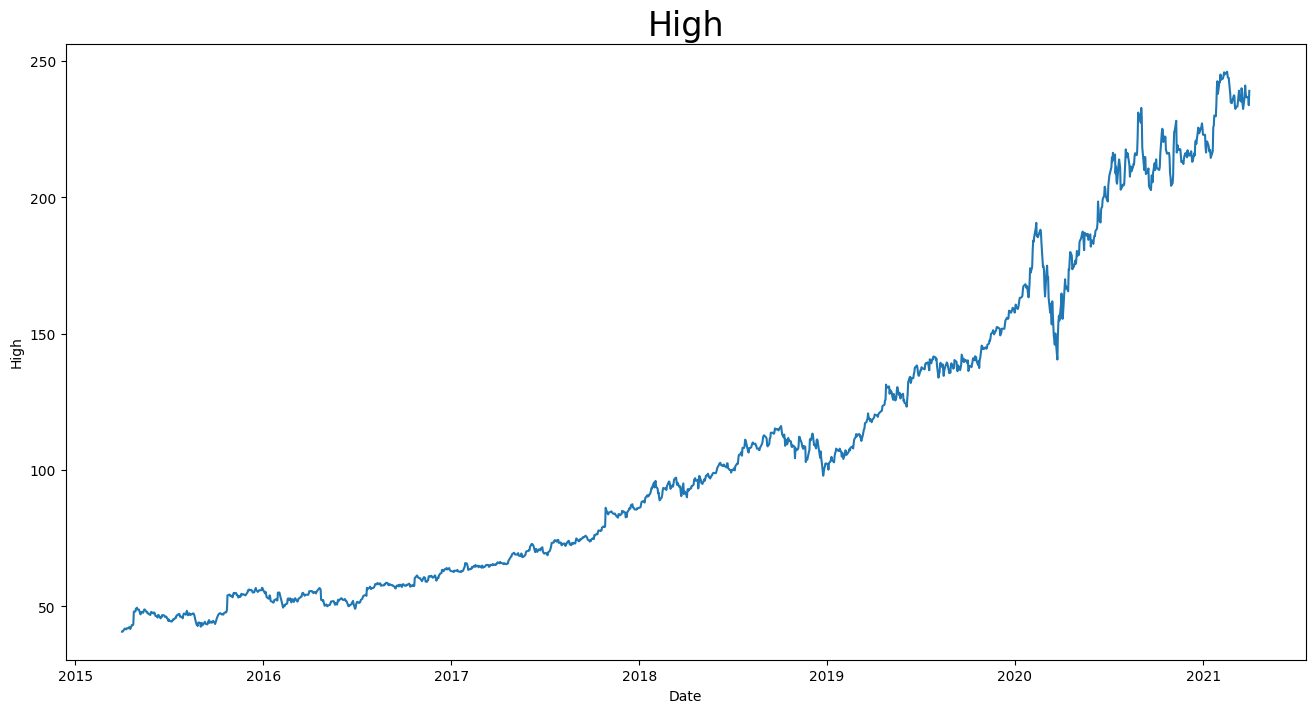

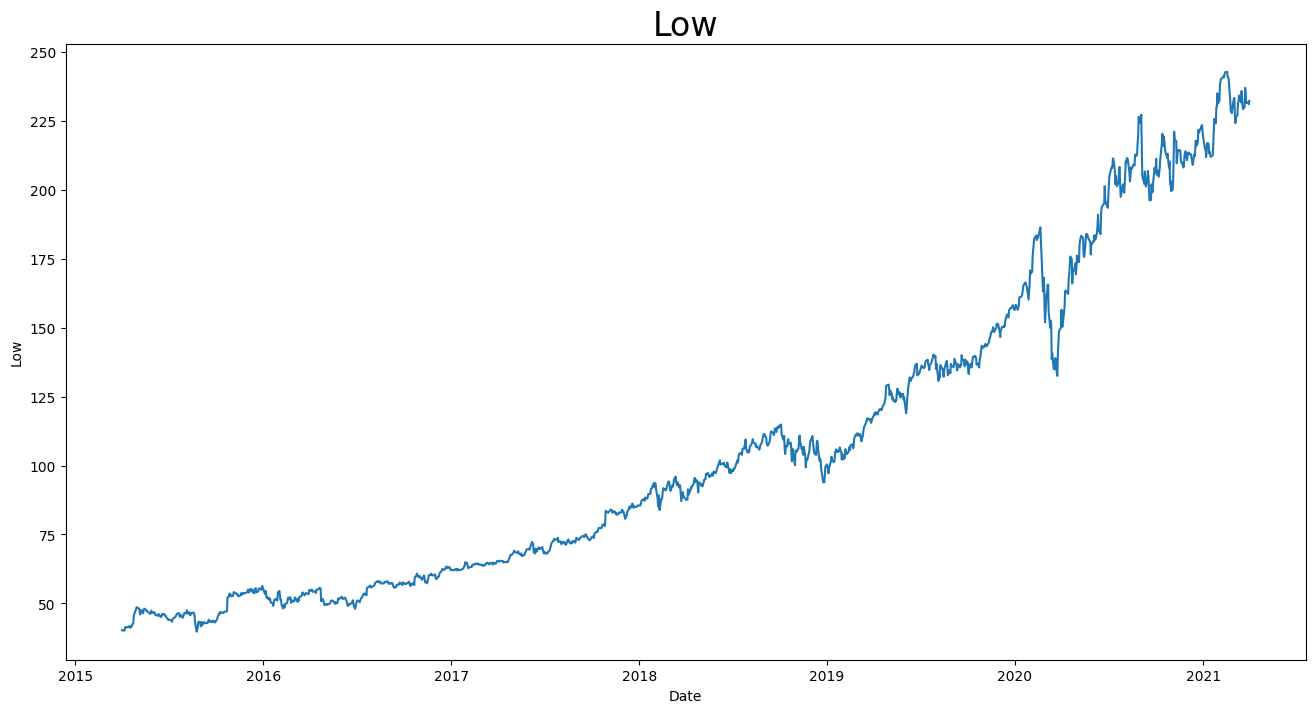

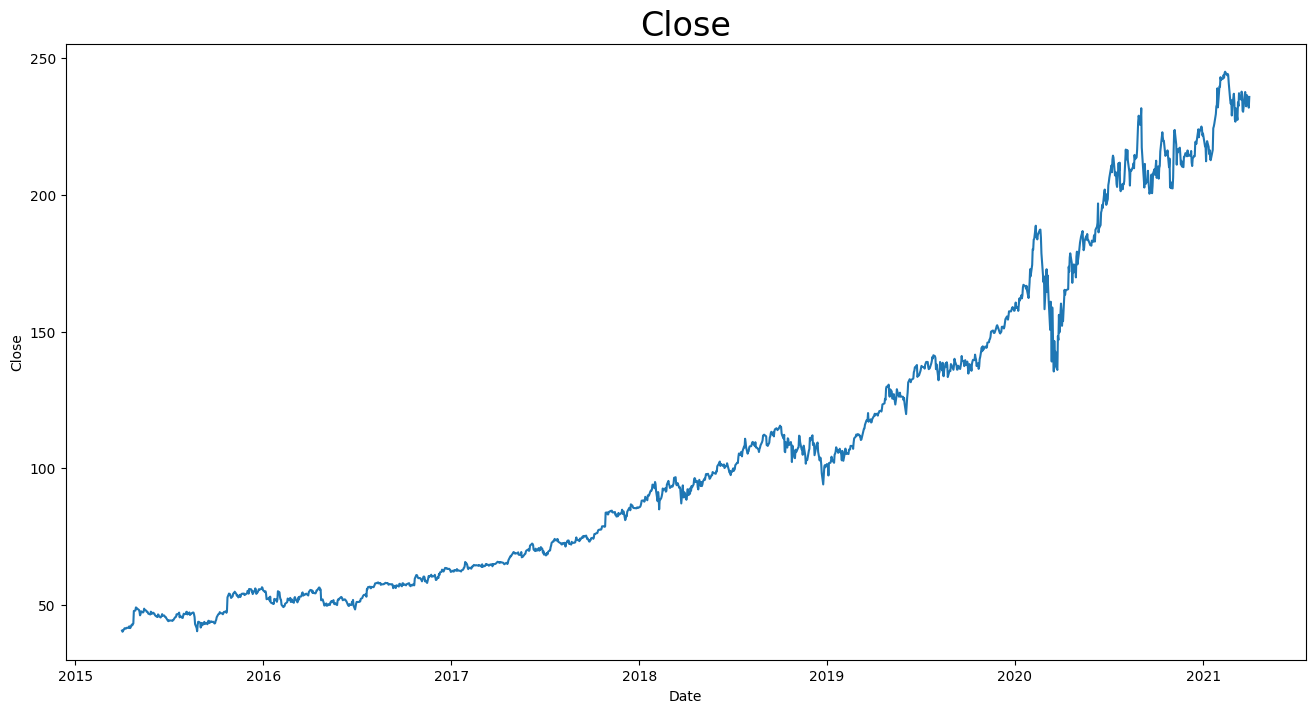

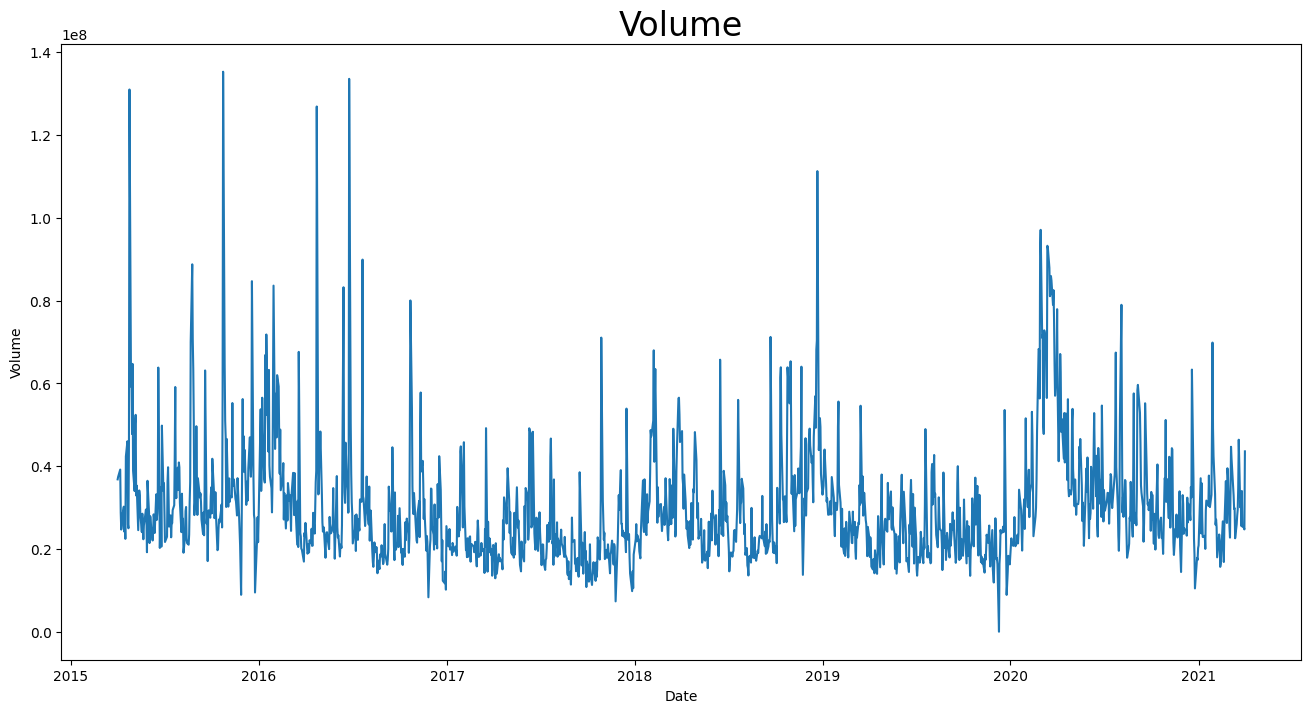

In [ ]:
# Let's draw a chart showing how volume , high and low prices changes over time .
for col in df.columns:
    plt.figure(figsize=(16,8))
    sns.lineplot(x = df.index ,y = df[col],data = df)
    plt.title(col , fontsize=24)
    plt.show()

It’s clear from the plots that there is an overall increase in the trend for all the variables ,with some seasonality in Volume plot.

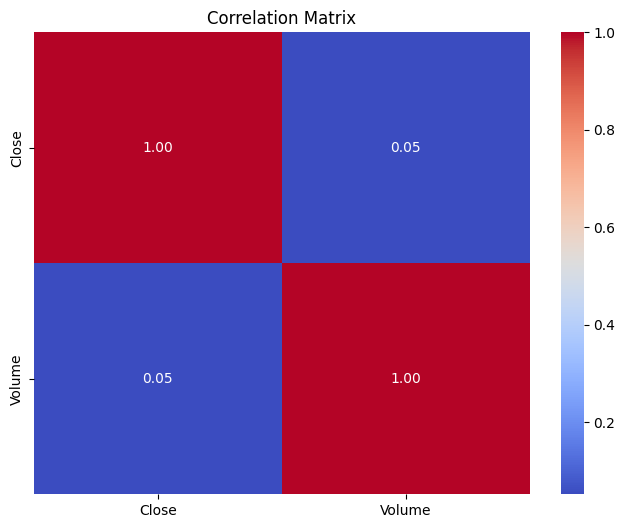

In [ ]:
#To check correlation using heat map
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Interpretation:**

In the above heatmap, we can see that the correlation coefficient between the close price and volume is  0.05.  This is a very weak positive correlation, which means that there is very little relationship between the closing price of Microsoft stock and the volume of Microsoft stock.

## Decomposition

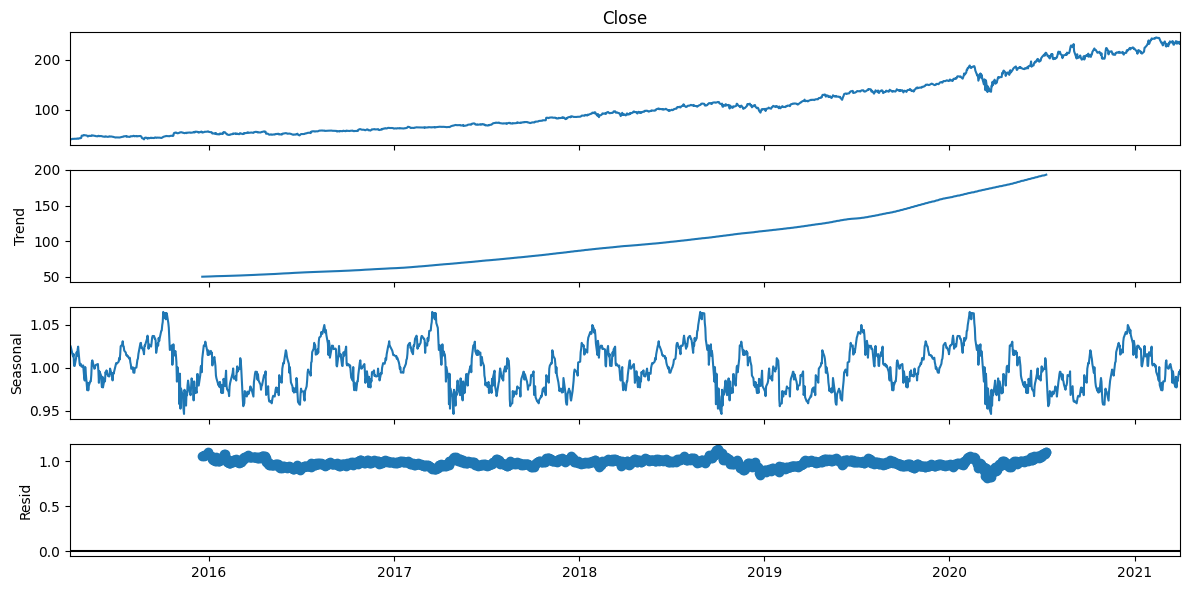

In [ ]:
#multiplicative decomposition model
rcParams['figure.figsize'] = 12, 6
decomposition_multiplicative = sm.tsa.seasonal_decompose(df['Close'], model='multiplicative', period=365)
fig = decomposition_multiplicative.plot()
plt.show()

**Interpretation:**

In the first plot, the line represents the actual closing prices of the stock over time. It captures the overall trend and fluctuations in the data.

Trend Component:
The trend component shows a gradual increase over time, indicating a long-term upward trend in the Microsoft stock prices. This suggests that, on average, the stock prices have been rising steadily over the analyzed period, possibly reflecting positive market sentiment or company performance.

Seasonal Component:
The seasonal component exhibits clear, periodic fluctuations around the trend line. This pattern suggests that Microsoft stock prices tend to experience regular fluctuations in response to seasonal factors or market cycles, such as increased demand during certain quarters or year-end financial reporting.

Residual Component:
This component represents the remaining variability in the data after removing trend and seasonality. From the plot, we can observe that there is very less variability in our dataset. The residual values are mostly clustered around 1, signifying Heteroskedasticity in our dataset.





## Q5. What are the measures you took to check for stationarity? What kind of stationarity was present and what did you do to solve it? (2m)

### Stationarity

In [ ]:
# Check for mean stationarity using Augmented Dickey-Fuller test
adf_result = sm.tsa.adfuller(df['Close'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"{key}: {value}")

# Interpretation: If the p-value is less than a significance level (e.g., 0.05),
# we reject the null hypothesis and consider the data stationary.

ADF Statistic: 1.7371362899270952
p-value: 0.9982158366942122
Critical Values:
1%: -3.4347582315402434
5%: -2.863486949792871
10%: -2.567806534528638


**Interpretation:**

The Augmented Dickey-Fuller (ADF) test is commonly used to assess the stationarity of a time series. The null hypothesis (H0) and alternative hypothesis (H1) for the ADF test can be stated as follows:

Null Hypothesis (H0): The time series data has a unit root, indicating that it is non-stationary.

Alternative Hypothesis (H1): The time series data does not have a unit root, indicating that it is stationary.

Criteria: If the test statistic exceeds critical values or if the p-value is smaller than 0.05 , the null hypothesis of a unit root is rejected, indicating stationarity.

In this case:

The ADF statistic (1.737) is greater than critical values at all significance levels.
Since, the P-value(0.998) >0.05, we failt to reject the null hypothesis.This means our time series is non-stationary indicating it may exhibit trends or seasonality.

In [ ]:
#To convert the closing price column into stationary
#Compute first-order difference of 'Close' column
df['Close_diff'] = df['Close'].diff()

# Drop missing values resulting from differencing
df.dropna(inplace=True)

# Check for stationarity again
adf_result2 = sm.tsa.adfuller(df['Close_diff'])
print('Results of Dickey-Fuller Test after differencing:')
print('Test Statistic:', adf_result2[0])
print('p-value:', adf_result2[1])
print('Critical Values:')
for key, value in adf_result2[4].items():
    print(f'{key}: {value}')

Results of Dickey-Fuller Test after differencing:
Test Statistic: -10.038331065146428
p-value: 1.5195939917529532e-17
Critical Values:
1%: -3.43476120520139
5%: -2.863488262178673
10%: -2.567807233388883


**Interpretation:**

The provided code calculates the first-order difference of the 'Close' column, effectively removing trends or seasonality present in the data.

Since the p-value (approximately 1.52e-17) < 0.05  and the test statistic being lower than all critical values, indicating strong evidence against the presence of a unit root and confirming stationarity.

Further when we do modeling, In the parameter of the model, we take the d value to be 1 because we have used differencing once to convert our column into stationary.

In [ ]:
# Check for variance stationarity using KPSS test
kpss_result = kpss(df['Close'])
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")

KPSS Statistic: 5.40742346606169
p-value: 0.01


<ipython-input-20-d86cd689078f>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['Close'])


**Interpretation:**

The KPSS test (Kwiatkowski-Phillips-Schmidt-Shin test) is used to assess the null hypothesis of stationarity in variance for a time series data set.

Hypothesis:
Null hypothesis (H0): The data is stationary in variance. This means the variance (spread) of the data remains constant throughout the time series.
Alternative hypothesis (H1): The data is non-stationary in variance. This means the variance changes over time.

Selection criteria:
If the p-value is less than the 0.05, we reject the null hypothesis. This suggests the data might exhibit non-stationarity in variance.

FROm the values obtained, The p-value of 0.01 is smaller than 0.05, suggesting strong evidence against the null hypothesis and indicating non-stationarity in the time series.

In [ ]:
#To achieve variance stationarity, we apply log transformation
# Apply log transformation to the 'Close' column
df['Log_Close'] = np.log(df['Close'])

## Q6. Explain your model output. If you forecasted for any amount of months, show that as well. (2m)

### ACF PACF Plot

---



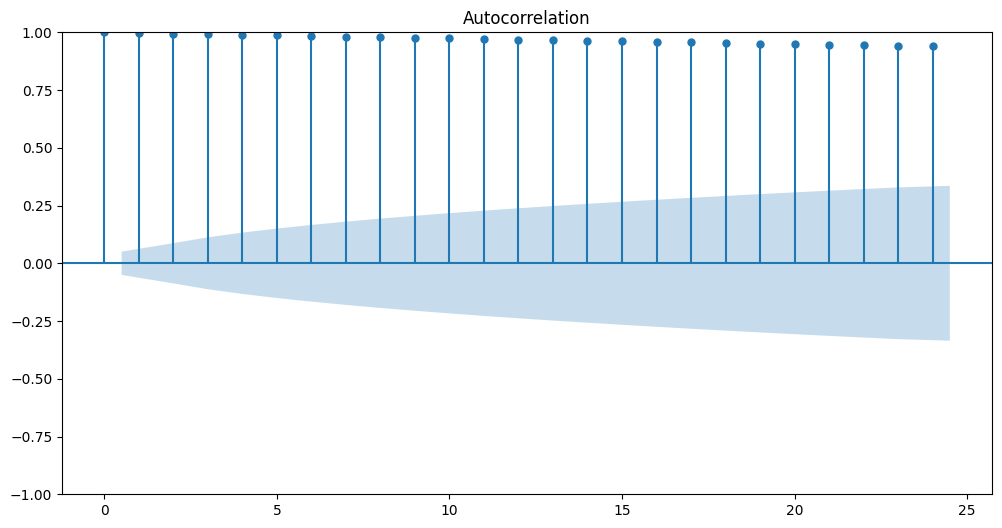

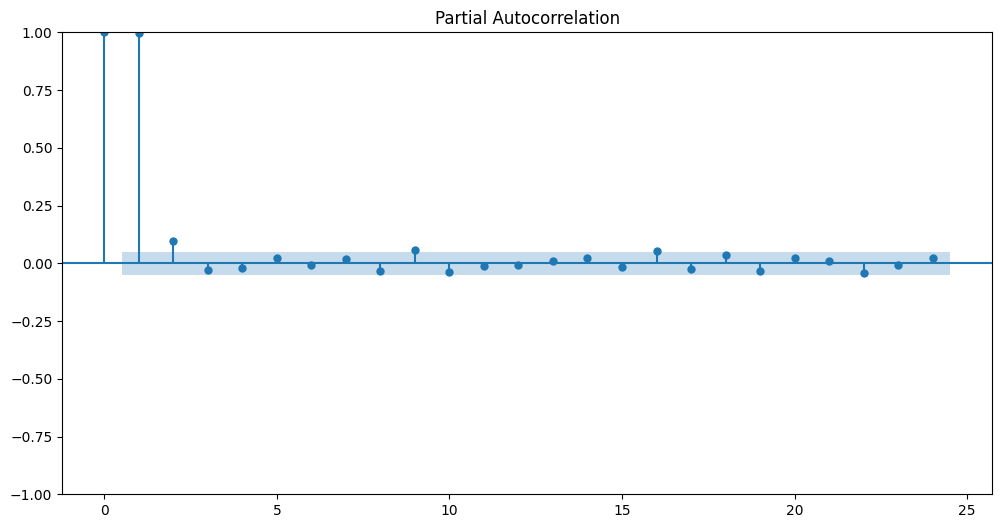

In [ ]:
#ACF PACF Plot for Close price data(non-stationary)
# ACF plot
plot_acf(df['Close'], lags=24)
plt.show()

# PACF plot
plot_pacf(df['Close'], lags=24)
plt.show()

**Interpretation:**

The ACF plot demonstrates exponential decay, indicating a significant autocorrelation at lag 1 and lag 2, followed by a rapid decrease, suggesting an autoregressive (AR) process capturing the data's autocorrelation structure.

Conversely, the PACF plot displays significant spikes at lag 1 and lag 2, indicative of their importance for the autoregressive component of the model.  Therefore, in this scenario, you would typically select p=2 for the AR parameter of the autoregressive integrated moving average (ARIMA) model.No significant spikes are expected beyond the second lag due to the absence of a moving average component (q=0), resembling a sine wave pattern.






### Model Fitting

In [ ]:
# Fit ARIMA model manually using the ACF/ PACF plot on the non stationary dataset

# Assuming (p, d, q) values for ARIMA model in order from ACF/ PACF plot
model_manual = ARIMA(df['Close'], order=(2,1,0))
model_fit_manual = model_manual.fit()

# Print model summary
print(model_fit_manual.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -3379.353
Date:                Sun, 31 Mar 2024   AIC                           6764.705
Time:                        10:45:13   BIC                           6780.663
Sample:                             0   HQIC                          6770.648
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2691      0.010    -26.015      0.000      -0.289      -0.249
ar.L2          0.0072      0.011      0.666      0.505      -0.014       0.028
sigma2         5.1603      0.075     68.897      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Interpretation:**

*1. Autoregressive Structure:*

The SARIMAX model, ARIMA(2, 1, 0), includes two autoregressive terms.
The first lag (ar.L1) significantly impacts the current observation (p < 0.05), while the second lag (ar.L2) does not.

*2. Residuals:*

Residual variance (sigma2) is 5.1603.
Residuals show slight left skewness (-0.50) and high kurtosis (15).

*3. Goodness of Fit:*

Log likelihood: -3379.353, AIC: 6764.705, indicating a satisfactory fit.
BIC and HQIC support model adequacy.

*4. Diagnostic Tests:*

Ljung-Box test (p = 0.83) shows no significant autocorrelation at lag 1.
Jarque-Bera test (p = 0.00) suggests non-normality in residuals.
Heteroskedasticity test indicates significant heteroskedasticity (p = 0.00).

Also, as there is Heteroskedasticity present in the data we have treated the data by doing log transformation in the next model.

In [ ]:
#Predicting the values and printing it
forecast_manual = model_fit_manual.forecast(steps=365)
df['forecast_manual'] = model_fit_manual.predict()
print(forecast_manual)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1510    234.690948
1511    235.009396
1512    234.915974
1513    234.943395
1514    234.935347
           ...    
1870    234.937173
1871    234.937173
1872    234.937173
1873    234.937173
1874    234.937173
Name: predicted_mean, Length: 365, dtype: float64


<Axes: xlabel='Date'>

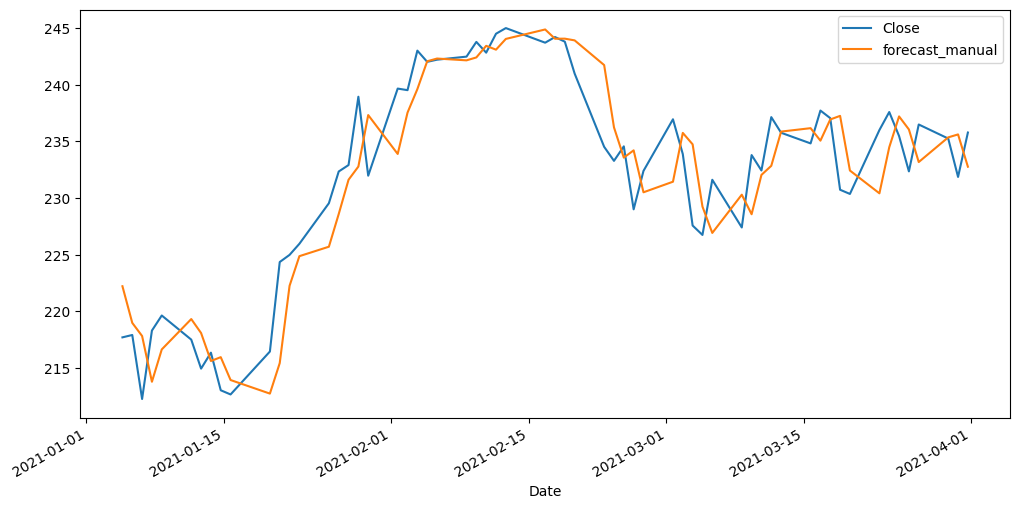

In [ ]:
#Plotting the predicted and actual values for the initial three months of 2021
df[['Close', 'forecast_manual']]['2021-01-01':'2021-03-31'].plot()

**Interpretation:**

The plot shows the comparsion between the actual values (blue line) and predicted values (orange line) of Closed price using the manual ARIMA(2,1,0) model. On x axis, is the date and on y axis, Closed price as shown.The plot allows us to visually assess how well the model's forecasts match the actual data patterns over time.

<Axes: xlabel='Date'>

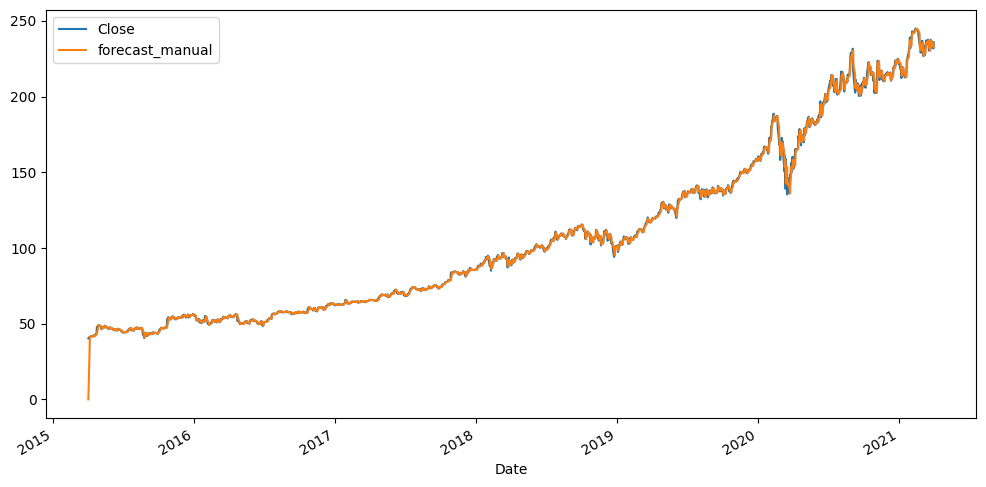

In [ ]:
#Plotting the predicted and actual values from 1st april 2015 to 31st march 2021( full dataset)
df[['Close', 'forecast_manual']]['2015-04-01':'2021-03-31'].plot()

<h3>Log Transformation<h3>

In [ ]:
# Applying Log transformation on the manual model
# Assuming (p, d, q) values for ARIMA model order
model_manual_log = ARIMA(df['Log_Close'], order=(2,1,0))
model_fit_manual_log = model_manual_log.fit()

# Print model summary
print(model_fit_manual_log.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                 1510
Model:                 ARIMA(2, 1, 0)   Log Likelihood                4004.040
Date:                Sun, 31 Mar 2024   AIC                          -8002.080
Time:                        10:45:14   BIC                          -7986.122
Sample:                             0   HQIC                         -7996.137
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2202      0.013    -17.026      0.000      -0.246      -0.195
ar.L2         -0.0040      0.014     -0.284      0.776      -0.031       0.023
sigma2         0.0003   5.09e-06     56.963      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Interpretation:**

*1. Capturing Autoregressive Dynamics:*

The SARIMAX model, ARIMA(2, 1, 0), successfully incorporates two autoregressive terms.
The significant coefficient for the first lag (ar.L1) highlights its substantial impact on the current observation, indicating a strong predictive component.
Although the coefficient for the second lag (ar.L2) is not statistically significant, the model still effectively captures the time series dynamics.

*2. Residual Analysis:*

The residual variance (sigma2) is remarkably low, indicating precise model predictions.
Despite minor deviations, such as slight left skewness and moderate kurtosis, the residuals overall demonstrate stability and reasonable fit.

*3. Goodness of Fit Validation:*

The log likelihood of 4004.040 and the associated AIC of -8002.080 showcase the model's robust fit to the data.
Additionally, the consistently low BIC and HQIC values affirm the model's appropriateness for the dataset.

*4. Diagnostic Confidence:*

The absence of significant autocorrelation at lag 1 (as indicated by the Ljung-Box test) ensures the model's ability to capture temporal dependencies effectively.
While the Jarque-Bera test suggests some deviation from normality in residuals, it's important to note that the model still maintains strong predictive power.

The comparative lower value of heteroskedasticity (Heteroskedasticity (H) = 1.79) suggests an inmprovement in the model's stability. This reduction in variance heterogeneity indicates that the model's predictions are more consistent across different level of the independent variables.

In summary, the SARIMAX model demonstrates a commendable ability to capture the underlying autoregressive dynamics of the time series, providing reliable predictions with strong statistical support.

In [ ]:
# Forecast future values using the fitted model
forecast_steps = 365
forecast_log_scale_manual = model_fit_manual_log.forecast(steps=forecast_steps)

# Convert the forecasted values back to the original scale
forecast_manual_log = np.exp(forecast_log_scale_manual)
df['forecast_manual_log'] = np.exp(model_fit_manual_log.predict())
print(np.exp(model_fit_manual_log.predict()))

Date
2015-04-02 16:00:00      1.000000
2015-04-06 16:00:00     40.290000
2015-04-07 16:00:00     41.270315
2015-04-08 16:00:00     41.529305
2015-04-09 16:00:00     41.444277
                          ...    
2021-03-25 16:00:00    235.918885
2021-03-26 16:00:00    233.031790
2021-03-29 16:00:00    235.574598
2021-03-30 16:00:00    235.495912
2021-03-31 16:00:00    232.597143
Name: predicted_mean, Length: 1510, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

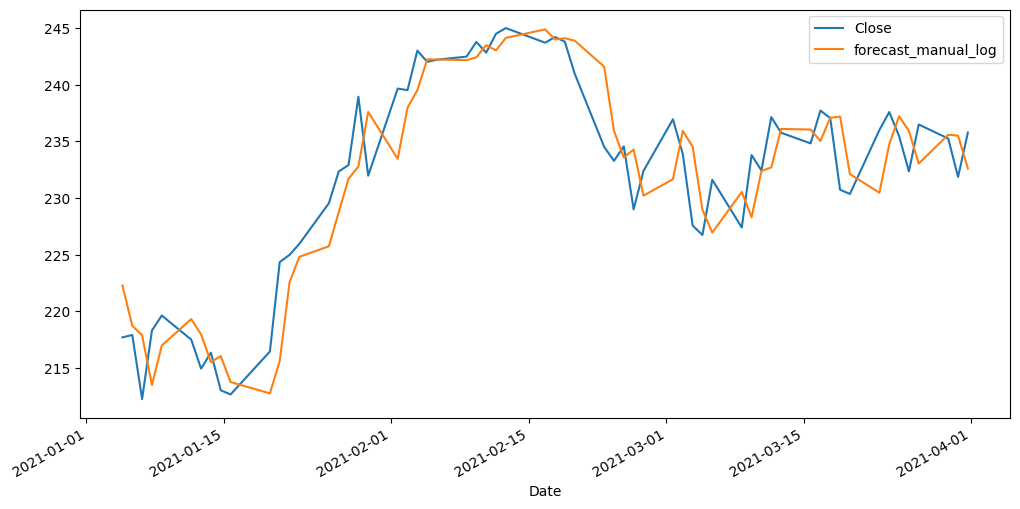

In [ ]:
#Plotting the predicted and actual values for the initial three months of 2021
df[['Close', 'forecast_manual_log']]['2021-01-01':'2021-03-31'].plot()

**Interpretation:**

The plot shows the comparsion between the actual values (blue line) and predicted values (orange line) of Closed price after applying log transformation using the manual ARIMA(2,1,0) model. On x axis, is the date and on y axis, Closed price as shown.The plot allows us to visually assess how well the model's forecasts match the actual data patterns over time.

<Axes: xlabel='Date'>

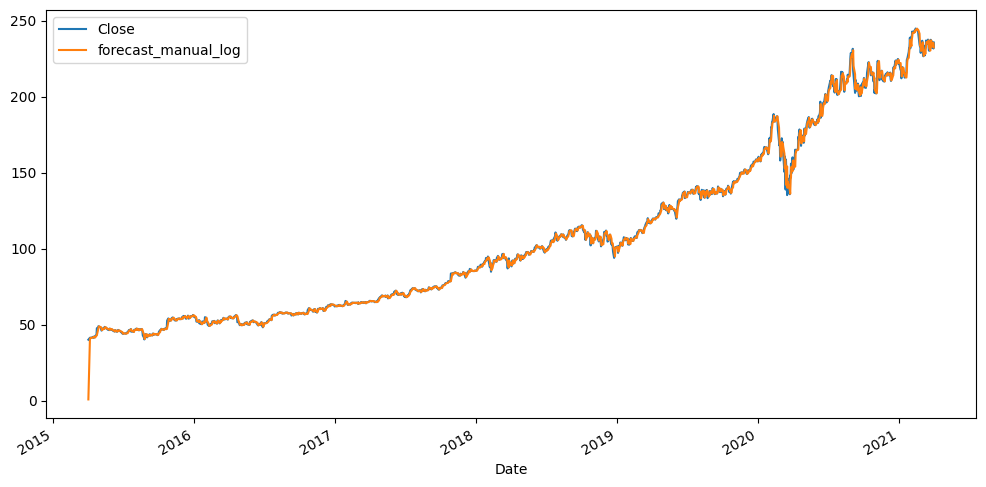

In [ ]:
#Plotting the predicted and actual values from 1st april 2015 to 31st march 2021( full dataset)
df[['Close', 'forecast_manual_log']]['2015-04-01':'2021-03-31'].plot()

### Auto ARIMA Model

In [ ]:
stepwise_fit= auto_arima(df['Close'],trace= True, suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6757.758, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6873.178, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6756.900, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6767.242, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6875.731, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6758.894, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6758.895, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6760.610, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6762.783, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.185 seconds


**Interpretation:**

The auto_arima function in the pmdarima library automatically selects the best-fitting ARIMA model by performing a stepwise search over a range of model configurations and evaluating each model based on statistical criteria such as AIC (Akaike Information Criterion). MOdel with lowest AIC value is the best fit model.

In [ ]:
# Fit Auto ARIMA model on the non stationary dataset
model1 = ARIMA(df['Close'], order=(1,1,0))
model_fit1 = model1.fit()

# Print model summary
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3379.391
Date:                Sun, 31 Mar 2024   AIC                           6762.783
Time:                        10:45:20   BIC                           6773.421
Sample:                             0   HQIC                          6766.745
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2710      0.010    -28.159      0.000      -0.290      -0.252
sigma2         5.1605      0.075     68.910      0.000       5.014       5.307
Ljung-Box (L1) (Q):                   0.02   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Interpretation:**

*1. Autoregressive Structure:*

The SARIMAX model, specified as ARIMA(1, 1, 0), includes one autoregressive term.
The coefficient for the first lag (ar.L1) is -0.2710, with a highly significant p-value (< 0.05), indicating a strong impact of the previous observation on the current one.

*2. Residuals:*

The variance of the residuals (sigma2) is estimated to be 5.1605.
Residuals exhibit a slight left skewness (-0.51) and high kurtosis (15.01).

*3. Goodness of Fit:*

The log likelihood is -3379.391, and the associated AIC is 6762.783, indicating a satisfactory fit.
BIC and HQIC values support the adequacy of the model.

*4. Diagnostic Tests:*

The Ljung-Box test (p = 0.90) suggests no significant autocorrelation at lag 1.
Jarque-Bera test (p = 0.00) indicates non-normality in residuals.
Heteroskedasticity test (p = 0.00) implies significant heteroskedasticity.

Overall, the model effectively captures the autoregressive dynamics of the time series, but non-normality and heteroskedasticity in residuals warrant further investigation.

Also, as there is Heteroskedasticity presetn in the data we have treated the data by doing log transformation in the next model.

In [ ]:
# Forecasting
forecast1 = model_fit1.forecast(steps=365)  # Forecasting 12 steps ahead
df['forecast1'] = model_fit1.predict()
print(forecast1)

1510    234.707647
1511    234.995554
1512    234.917529
1513    234.938674
1514    234.932944
           ...    
1870    234.934166
1871    234.934166
1872    234.934166
1873    234.934166
1874    234.934166
Name: predicted_mean, Length: 365, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

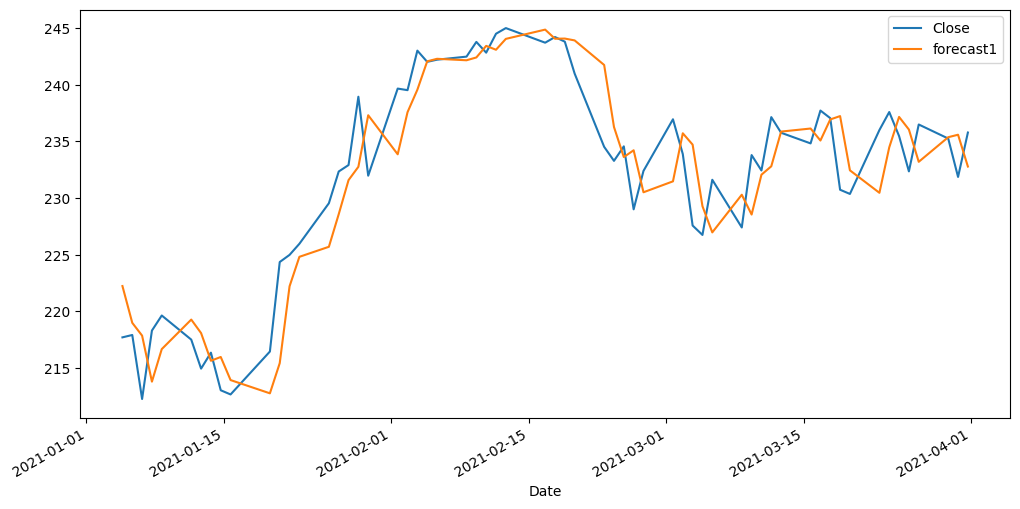

In [ ]:
df[['Close', 'forecast1']]['2021-01-01':'2021-03-31'].plot()

**Interpretation:**

The plot shows the comparsion between the actual values (blue line) and predicted values (orange line) of Closed price using the auto ARIMA(1,1,0) model. On x axis, is the date and on y axis, Closed price as shown.The plot allows us to visually assess how well the model's forecasts match the actual data patterns over time.

<Axes: xlabel='Date'>

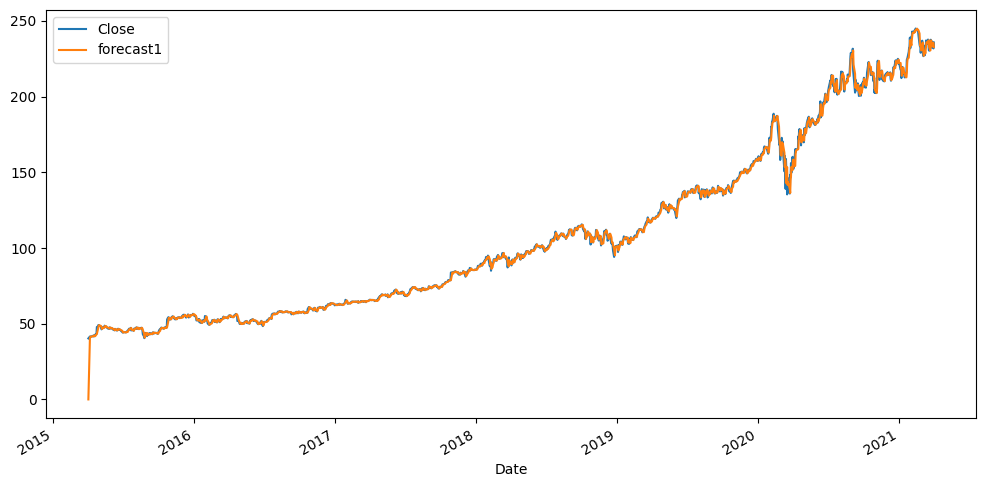

In [ ]:
df[['Close', 'forecast1']]['2015-04-01':'2021-03-31'].plot()

<h3>Log Transformation<h3>

In [ ]:
# Apply log transformation to the 'Close' column
df['Log_Close'] = np.log(df['Close'])

# Fit ARIMA model on the log-transformed data
model2 = ARIMA(df['Log_Close'], order=(1, 1, 0))  # Example order, adjust as needed
model_fit2 = model2.fit()
# Print model summary
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                 1510
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4004.028
Date:                Sun, 31 Mar 2024   AIC                          -8004.056
Time:                        10:45:20   BIC                          -7993.417
Sample:                             0   HQIC                         -8000.094
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2189      0.012    -18.735      0.000      -0.242      -0.196
sigma2         0.0003   5.08e-06     57.137      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.09   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Interpretation:**

*1. Effective Autoregressive Structure:*

The SARIMAX model, ARIMA(1, 1, 0), leverages one autoregressive term with confidence.
The highly significant coefficient for the first lag (ar.L1) at -0.2189 signifies a robust relationship between past and current observations, indicating strong predictive power.

*2. Residual Analysis:*

Remarkably low residual variance (sigma2) of 0.0003 underscores the model's precision in capturing underlying patterns.
Despite minor deviations like slight left skewness and moderate kurtosis, the residuals demonstrate overall stability, affirming the model's reliability.

*3.Goodness of Fit Validation:*

A log likelihood of 4004.028 and an AIC of -8004.056 signify an excellent fit, providing confidence in the model's accuracy.
Consistent support from BIC and HQIC further reinforces the model's appropriateness for the dataset.

*4. Diagnostic Confidence:*

The non-significant p-value (p = 0.76) from the Ljung-Box test indicates no significant autocorrelation at lag 1, validating the model's ability to capture temporal dependencies effectively.
While the Jarque-Bera test suggests minor deviations from normality in residuals, the model maintains strong predictive capability.

The comparative lower value of heteroskedasticity (Heteroskedasticity (H) = 1.79) suggests an inmprovement in the model's stability. This reduction in variance heterogeneity indicates that the model's predictions are more consistent across different level of the independent variables.

In essence, the SARIMAX model showcases a commendable ability to capture the autoregressive dynamics of the time series, providing reliable predictions and instilling confidence in its utility for analysis and forecasting.

In [ ]:
# Forecast future values using the fitted model
forecast_steps = 365  # Adjust the number of steps you want to forecast
forecast_log_scale = model_fit2.forecast(steps=forecast_steps)

# Convert the forecasted values back to the original scale
forecast2 = np.exp(forecast_log_scale)
df['forecast2'] = np.exp(model_fit2.predict())
print(np.exp(model_fit2.predict()))

Date
2015-04-02 16:00:00      1.000000
2015-04-06 16:00:00     40.290000
2015-04-07 16:00:00     41.270846
2015-04-08 16:00:00     41.534377
2015-04-09 16:00:00     41.444055
                          ...    
2021-03-25 16:00:00    235.922467
2021-03-26 16:00:00    233.019447
2021-03-29 16:00:00    235.567449
2021-03-30 16:00:00    235.510892
2021-03-31 16:00:00    232.587905
Name: predicted_mean, Length: 1510, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

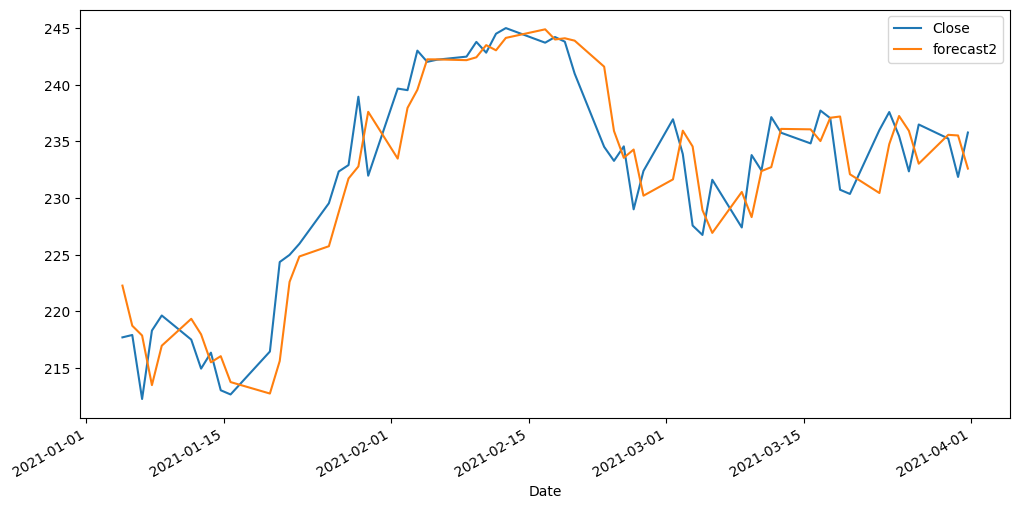

In [ ]:
df[['Close', 'forecast2']]['2021-01-01':'2021-03-31'].plot()

**Interpretation:**

The plot shows the comparsion between the actual values (blue line) and predicted values (orange line) of Closed price after applying log transformation using the auto ARIMA(1,1,0) model. On x axis, is the date and on y axis, Closed price as shown.The plot allows us to visually assess how well the model's forecasts match the actual data patterns over time.

<Axes: xlabel='Date'>

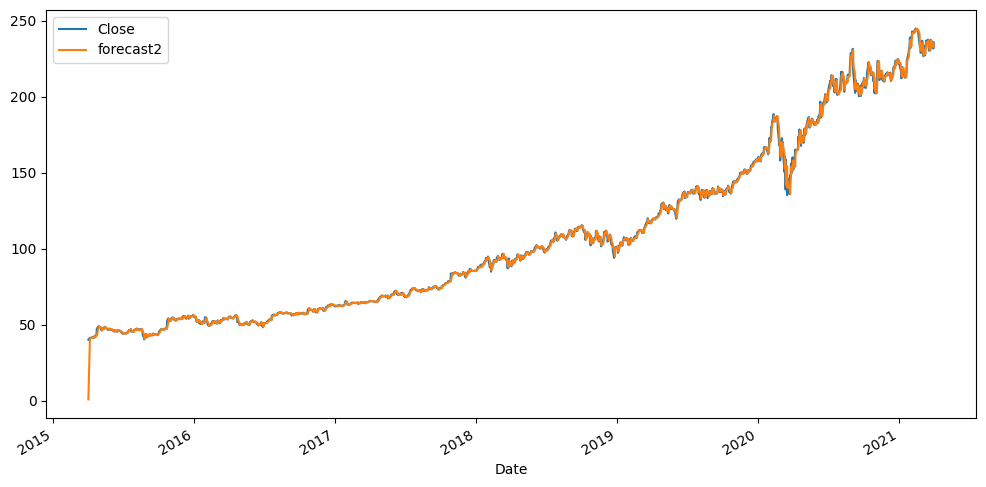

In [ ]:
df[['Close', 'forecast2']]['2015-04-01':'2021-03-31'].plot()

## Q7. Conclude your analysis. (1m)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Close_diff,Log_Close,forecast_manual,forecast_manual_log,forecast1,forecast2
Date,,,,,,,,,,,
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.43,3.696103,0.000000,1.000000,0.000000,1.000000
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,1.26,3.726898,40.289939,40.290000,40.289939,40.290000
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.02,3.726416,41.208529,41.270315,41.208530,41.270846
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.11,3.723764,41.544417,41.529305,41.535420,41.534377
2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861,0.06,3.725211,41.449454,41.444277,41.449811,41.444055


### Accuracy of the models

In [ ]:
actual_values = df['Close']
predicted_values1 = df['forecast_manual_log']
predicted_values2 = df['forecast2']

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'actual_values' are the actual values of the time series and 'predicted_values' are the predicted values from your model
# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(actual_values, predicted_values1)

# Calculate Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mse1)

print("Root Mean Squared Error (RMSE):", rmse1)

Root Mean Squared Error (RMSE): 2.4889472377606565


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'actual_values' are the actual values of the time series and 'predicted_values' are the predicted values from your model
# Calculate Mean Squared Error (MSE)
mse2 = mean_squared_error(actual_values, predicted_values2)

# Calculate Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mse2)

print("Root Mean Squared Error (RMSE):", rmse2)

Root Mean Squared Error (RMSE): 2.4888670102063104


**Interpretation:**

The RMSE value of the Manual ARIMA after log tranformaion is 2.48894 while the RMSE of the Auto ARIMA after the log transformation is 2.48886

Since, the RMSE value of the Auto ARIMA is less than Manual ARIMA after the log transformation. Thereforer, Auto ARIMA after the log transformation is the best fit model.